In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import pandas as pd
import json

import dask.dataframe as dd
import matplotlib.pyplot as plt

from gzreduction.vote_sources.panoptes_exports import export_to_responses
from gzreduction.vote_sources.panoptes_exports import aggregate
from gzreduction.schemas.cd_schema import cd_schema

In [17]:
schema = cd_schema

In [18]:
classification_export_loc = '/home/walml/repos/gz-panoptes-reduction/data/cosmic_dawn/cosmic-dawn-workflow-classifications_2024-01-11.csv'
aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/cosmic_dawn/cosmic_dawn_reduced_votes.csv'
# 5.7M classifications currently

In [19]:
# nrows = 10000
nrows = None
clf = pd.read_csv(classification_export_loc, nrows=nrows)
# clf = dd.read_csv(classification_export_loc)
clf

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,445824444,not-logged-in-c043e78be6bad658f144,NaN,c043e78be6bad658f144,21802,Cosmic Dawn workflow,67.91,2022-10-21 14:17:10 UTC,NaN,NaN,"{""source"":""api"",""session"":""f72d06e322dcf3e5b58...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""81371870"":{""retired"":{""id"":108698450,""workfl...",81371870
1,445824476,not-logged-in-c043e78be6bad658f144,NaN,c043e78be6bad658f144,21802,Cosmic Dawn workflow,67.91,2022-10-21 14:17:21 UTC,NaN,NaN,"{""source"":""api"",""session"":""f72d06e322dcf3e5b58...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""81398125"":{""retired"":{""id"":108658138,""workfl...",81398125
2,445824529,not-logged-in-669be87f7c5643b3424b,NaN,669be87f7c5643b3424b,21802,Cosmic Dawn workflow,67.91,2022-10-21 14:17:38 UTC,NaN,NaN,"{""source"":""api"",""session"":""f72d06e322dcf3e5b58...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""81416697"":{""retired"":{""id"":108694182,""workfl...",81416697
3,445824555,not-logged-in-39ac0cbbde51082655e6,NaN,39ac0cbbde51082655e6,21802,Cosmic Dawn workflow,67.91,2022-10-21 14:17:49 UTC,NaN,NaN,"{""source"":""api"",""session"":""f72d06e322dcf3e5b58...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""81417291"":{""retired"":{""id"":108695578,""workfl...",81417291
4,445824629,not-logged-in-824a65a495144e614fe1,NaN,824a65a495144e614fe1,21802,Cosmic Dawn workflow,67.91,2022-10-21 14:18:20 UTC,NaN,NaN,"{""source"":""api"",""session"":""f72d06e322dcf3e5b58...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""81361994"":{""retired"":{""id"":108691250,""workfl...",81361994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540871,527774148,not-logged-in-119e7d84502254486c5b,NaN,119e7d84502254486c5b,21802,Cosmic Dawn workflow,70.94,2023-12-08 10:18:03 UTC,NaN,NaN,"{""source"":""api"",""session"":""953c5a311416d75a728...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""81397987"":{""retired"":{""id"":108639250,""workfl...",81397987
1540872,527774162,not-logged-in-119e7d84502254486c5b,NaN,119e7d84502254486c5b,21802,Cosmic Dawn workflow,70.94,2023-12-08 10:18:13 UTC,NaN,NaN,"{""source"":""api"",""session"":""953c5a311416d75a728...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""81366716"":{""retired"":{""id"":108657525,""workfl...",81366716
1540873,527774177,not-logged-in-119e7d84502254486c5b,NaN,119e7d84502254486c5b,21802,Cosmic Dawn workflow,70.94,2023-12-08 10:18:25 UTC,NaN,NaN,"{""source"":""api"",""session"":""953c5a311416d75a728...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""88729426"":{""retired"":{""id"":115958323,""workfl...",88729426
1540874,527774195,not-logged-in-119e7d84502254486c5b,NaN,119e7d84502254486c5b,21802,Cosmic Dawn workflow,70.94,2023-12-08 10:18:37 UTC,NaN,NaN,"{""source"":""api"",""session"":""953c5a311416d75a728...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""81417862"":{""retired"":{""id"":108654944,""workfl...",81417862


In [20]:
# clf['subject_data'].compute()

In [21]:
# clf = clf.compute()

In [22]:
def get_hsc_subject_id(subject_data):
    # print(subject_data)
    loaded = json.loads(subject_data)
    inner_dict = loaded[list(loaded.keys())[0]]
    try:
        return inner_dict['id']
    except KeyError:
        return inner_dict['!id']

In [23]:
clf['id_str'] = clf['subject_data'].apply(get_hsc_subject_id)  #  meta=('subject_data', str)
# clf['id_str'] = clf['subject_data'].apply(get_hsc_subject_id)

In [24]:
workflows = [21802]
clf = clf[clf['workflow_id'].isin(workflows)]

In [25]:
df = export_to_responses.explode_annotations(clf, exclude_tasks=['T10', 'T12'])
df

,task,task_label,value,id_str,user_id,classification_id,created_at,subject_ids,workflow_version
0,T0,"Is the galaxy simply smooth and rounded, with ...",![smooth_triple_flat_new.png](https://panoptes...,265684,NaN,445824444,2022-10-21 14:17:10 UTC,81371870,67.91
0,T1,How rounded is it?,![rounded.png](https://panoptes-uploads.zooniv...,265684,NaN,445824444,2022-10-21 14:17:10 UTC,81371870,67.91
0,T11,Is the galaxy merging or disturbed?,![no.png](https://panoptes-uploads.zooniverse....,265684,NaN,445824444,2022-10-21 14:17:10 UTC,81371870,67.91
1,T0,"Is the galaxy simply smooth and rounded, with ...",![smooth_triple_flat_new.png](https://panoptes...,356517,NaN,445824476,2022-10-21 14:17:21 UTC,81398125,67.91
1,T1,How rounded is it?,![rounded.png](https://panoptes-uploads.zooniv...,356517,NaN,445824476,2022-10-21 14:17:21 UTC,81398125,67.91
...,...,...,...,...,...,...,...,...,...
1540874,T1,How rounded is it?,![rounded.png](https://panoptes-uploads.zooniv...,518076,NaN,527774195,2023-12-08 10:18:37 UTC,81417862,70.94
1540874,T11,Is the galaxy merging or disturbed?,![no.png](https://panoptes-uploads.zooniverse....,518076,NaN,527774195,2023-12-08 10:18:37 UTC,81417862,70.94
1540875,T0,"Is the galaxy simply smooth and rounded, with ...",![smooth_triple_flat_new.png](https://panoptes...,883675,NaN,527780329,2023-12-08 11:07:21 UTC,85234295,70.94
1540875,T1,How rounded is it?,![rounded.png](https://panoptes-uploads.zooniv...,883675,NaN,527780329,2023-12-08 11:07:21 UTC,85234295,70.94


In [26]:
# minimise memory
del clf
del df['workflow_version']

del df['created_at']
del df['user_id']

df = df.drop_duplicates(subset=['classification_id', 'task', 'value'])
# del df['classification_id']

In [27]:
df = df.reset_index(drop=True)
df

,task,task_label,value,id_str,classification_id,subject_ids
0,T0,"Is the galaxy simply smooth and rounded, with ...",![smooth_triple_flat_new.png](https://panoptes...,265684,445824444,81371870
1,T1,How rounded is it?,![rounded.png](https://panoptes-uploads.zooniv...,265684,445824444,81371870
2,T11,Is the galaxy merging or disturbed?,![no.png](https://panoptes-uploads.zooniverse....,265684,445824444,81371870
3,T0,"Is the galaxy simply smooth and rounded, with ...",![smooth_triple_flat_new.png](https://panoptes...,356517,445824476,81398125
4,T1,How rounded is it?,![rounded.png](https://panoptes-uploads.zooniv...,356517,445824476,81398125
...,...,...,...,...,...,...
5713518,T1,How rounded is it?,![rounded.png](https://panoptes-uploads.zooniv...,518076,527774195,81417862
5713519,T11,Is the galaxy merging or disturbed?,![no.png](https://panoptes-uploads.zooniverse....,518076,527774195,81417862
5713520,T0,"Is the galaxy simply smooth and rounded, with ...",![smooth_triple_flat_new.png](https://panoptes...,883675,527780329,85234295
5713521,T1,How rounded is it?,![rounded.png](https://panoptes-uploads.zooniv...,883675,527780329,85234295


In [28]:
df = export_to_responses.clean_exploded_annotations(df, schema)
# takes 5+ minutes

In [29]:
aggregated = aggregate.responses_to_reduced_votes(df.reset_index(drop=True), schema)

/home/walml/repos/gz-panoptes-reduction/gzreduction/vote_sources/panoptes_exports/aggregate.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[question.get_fraction_column(answer)] = df[question.get_count_column(answer)] / df[question.total_votes]  # may give nans?
/home/walml/repos/gz-panoptes-reduction/gzreduction/vote_sources/panoptes_exports/aggregate.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[question.get_fraction_column(answer)] = df[question.get_count_column(answer)] / df[question.total_votes]  # may giv

In [30]:
aggregated

question_response,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_problem,how-rounded_round,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,...,problem_star_fraction,problem_artifact_fraction,problem_zoom_fraction,artifact_non-star_fraction,artifact_satellite_fraction,artifact_scattered_fraction,artifact_diffraction_fraction,artifact_ray_fraction,artifact_saturation_fraction,artifact_other_fraction
0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81,4,0,36,4,0,0,0,0,0,...,0.388889,0.000000,0.611111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162,33,0,7,25,8,0,0,0,0,...,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,206,27,2,11,18,9,0,1,1,1,...,0.000000,0.090909,0.909091,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,253,30,0,10,25,5,0,0,0,0,...,0.200000,0.000000,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63488,40985412616870886,14,21,5,0,0,14,21,0,16,...,0.000000,0.400000,0.600000,0.0,0.5,0.0,0.5,0.0,0.0,0.0
63489,40985412616871366,27,7,6,0,26,1,0,7,0,...,0.000000,0.166667,0.833333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63490,40985416911839377,29,3,8,5,23,1,1,2,1,...,0.125000,0.000000,0.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63491,40985429796734874,0,1,0,0,0,0,0,1,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
aggregated.to_csv(aggregated_loc, index=False)

Some quick graphs

In [32]:
aggregated['smooth-or-featured_smooth'].sum(), aggregated['smooth-or-featured_featured-or-disk'].sum(), aggregated['smooth-or-featured_problem'].sum()

(790740, 344438, 405698)

Text(0.5, 1.0, 'GZ CD Latest Aggregation')

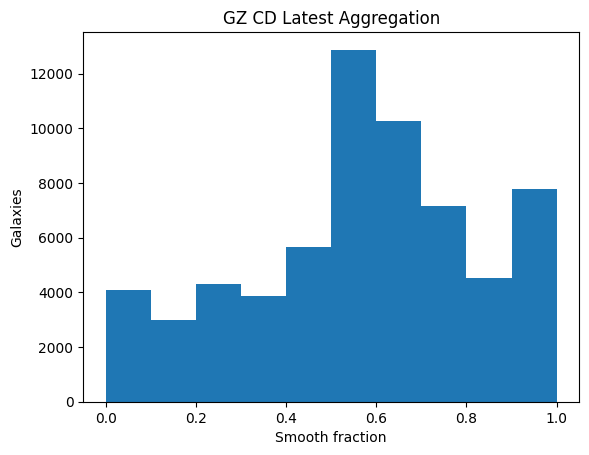

In [33]:
plt.hist(aggregated['smooth-or-featured_smooth_fraction'], bins=10)
plt.xlabel('Smooth fraction')
plt.ylabel('Galaxies')
plt.title('GZ CD Latest Aggregation')

In [37]:
plt.hist(aggregated['smooth-or-featured_total-votes'], bins=10)
plt.xlim([0., 100.])
plt.xlabel('Total votes')
plt.ylabel('Galaxies')
plt.title('GZ CD Latest Aggregation')

KeyError: 'smooth-or-featured_total-votes'

In [35]:
# tweak catalog to include renamed columns in format {question}-cd_{answer} expected by zoobot ortho schema

from zoobot.shared.schemas import cosmic_dawn_ortho_schema

aggregated = pd.read_csv(aggregated_loc)

renamer = {}
for question in cosmic_dawn_ortho_schema.questions:
  renamer[question.text.replace('-cd', '') + '_total-votes'] = question.text + '_total-votes'
  for answer in question.answers:
    renamer[answer.text.replace('-cd', '')] = answer.text
    renamer[answer.text.replace('-cd', '') + '_fraction'] = answer.text + '_fraction'
# print(renamer)
aggregated = aggregated.rename(columns=renamer)

for label_col in cosmic_dawn_ortho_schema.label_cols:
  assert label_col in aggregated.columns.values, 'Missing {}'.format(label_col)

aggregated.to_csv(aggregated_loc.replace('.csv', '_ortho.csv'), index=False)


/home/walml/miniforge3/envs/zoobot39_cu121_dev/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
